In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

In [5]:
dataset.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [6]:
dataset.shape

(53392, 33)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [10]:
dataset.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [12]:
#Getting Rid of All Extraneous Info

dataset = dataset.drop(['Low_Confidence_Limit','High_Confidence_Limit ','YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                53392 non-null  int64  
 1   LocationAbbr             53392 non-null  object 
 2   LocationDesc             53392 non-null  object 
 3   Question                 53392 non-null  object 
 4   Data_Value               48346 non-null  float64
 5   Data_Value_Alt           48346 non-null  float64
 6   Sample_Size              48346 non-null  float64
 7   Total                    1907 non-null   object 
 8   Age(years)               11438 non-null  object 
 9   Education                7628 non-null   object 
 10  Gender                   3814 non-null   object 
 11  Income                   13349 non-null  object 
 12  Race/Ethnicity           15256 non-null  object 
 13  GeoLocation              52384 non-null  object 
 14  LocationID            

In [20]:
#Create separate Dataform from dataset by gender datagender, by education level dataedu, and by income dataedu

datagender =dataset[(dataset['Stratification1']=='Male')|(dataset['Stratification1']=='Female')].reset_index(drop = True)
dataedu=dataset[dataset['StratificationCategory1']=='Education'].reset_index(drop = True)
datainc=dataset[dataset['StratificationCategory1']=='Income'].reset_index(drop = True)


In [21]:
dataedu

,YearStart,LocationAbbr,LocationDesc,Question,Data_Value,Data_Value_Alt,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,33.6,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,Less than high school
1,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.8,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,High school graduate
2,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,33.8,33.8,1925.0,NaN,NaN,Some college or technical school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,Some college or technical school
3,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,26.4,26.4,1812.0,NaN,NaN,College graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,College graduate
4,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,33.2,33.2,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,Less than high school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7623,2016,PR,Puerto Rico,Percent of adults who engage in no leisure-tim...,33.9,33.9,1735.0,NaN,NaN,College graduate,NaN,NaN,NaN,"(18.220833, -66.590149)",72,Education,College graduate
7624,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,29.2,29.2,238.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(18.335765, -64.896335)",78,Education,Less than high school
7625,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,26.9,26.9,394.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(18.335765, -64.896335)",78,Education,High school graduate
7626,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,31.2,31.2,230.0,NaN,NaN,Some college or technical school,NaN,NaN,NaN,"(18.335765, -64.896335)",78,Education,Some college or technical school


In [22]:
datagender['Question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
     

In [23]:
#here we are interested in the survey question directly about obesity and overweight percent

X=['Percent of adults aged 18 years and older who have obesity','Percent of adults aged 18 years and older who have an overweight classification']

In [24]:

datagender = datagender[datagender['Question']==X[0]]

In [25]:
datagender

,YearStart,LocationAbbr,LocationDesc,Question,Data_Value,Data_Value_Alt,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.3,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Male
1,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,31.8,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Female
14,2012,US,National,Percent of adults aged 18 years and older who ...,27.4,27.4,257190.0,NaN,NaN,NaN,Female,NaN,NaN,NaN,59,Gender,Female
19,2012,AL,Alabama,Percent of adults aged 18 years and older who ...,31.8,31.8,3016.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Male
20,2012,AL,Alabama,Percent of adults aged 18 years and older who ...,34.1,34.1,5635.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3699,2016,GU,Guam,Percent of adults aged 18 years and older who ...,27.3,27.3,805.0,NaN,NaN,NaN,Female,NaN,NaN,"(13.444304, 144.793731)",66,Gender,Female
3700,2016,PR,Puerto Rico,Percent of adults aged 18 years and older who ...,30.0,30.0,2105.0,NaN,NaN,NaN,Male,NaN,NaN,"(18.220833, -66.590149)",72,Gender,Male
3701,2016,PR,Puerto Rico,Percent of adults aged 18 years and older who ...,31.4,31.4,3423.0,NaN,NaN,NaN,Female,NaN,NaN,"(18.220833, -66.590149)",72,Gender,Female
3702,2016,VI,Virgin Islands,Percent of adults aged 18 years and older who ...,22.2,22.2,468.0,NaN,NaN,NaN,Male,NaN,NaN,"(18.335765, -64.896335)",78,Gender,Male


In [27]:
datagender['YearStart'].value_counts()

2016    110
2014    108
2015    108
2013    106
2011    104
2012    104
Name: YearStart, dtype: int64

In [30]:
df16=datagender[datagender['YearStart']==2016]

In [34]:
df16['LocationDesc'].unique()

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Guam', 'Puerto Rico',
       'Virgin Islands'], dtype=object)

In [36]:
#group data by state and take the mean of men and women rates for each state

sorted_df = datagender.sort_values(['LocationDesc'], ascending = [True])
sorted_df=sorted_df[['LocationAbbr','LocationDesc','Data_Value','Gender']]
sorted_df = sorted_df.groupby('LocationDesc', as_index=False).mean()


In [37]:
#calculate the average (over men and women) obesity rate for the country
natmeanobesity2016=sum(df16['Data_Value'])/len(df16)
print(natmeanobesity2016)

29.802727272727267


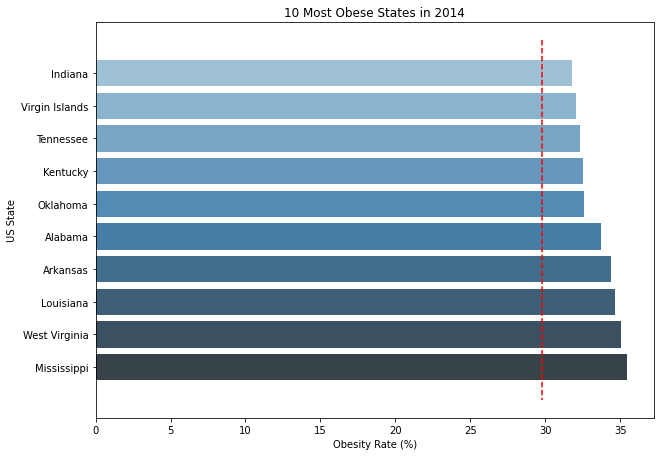

In [39]:
sorted_df = sorted_df.sort_values(['Data_Value'], ascending = [True])

plt.figure(figsize = (10,16))

plt.subplot(2,1,1)
ax=sns.barplot(y=sorted_df.tail(10).LocationDesc,x=sorted_df.tail(10).Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Most Obese States in 2014')

plt.plot([natmeanobesity2016,natmeanobesity2016],[-1,10], '--',color = 'r')